In [1]:
from models import VocabularyKnowledgeModel, SimulatedUserEnv
from plots import plot_knowledge_curve, plot_estimates, animate_normal_distributions

In [2]:
# Create a simulated user with known parameters
true_mu = 5000
true_std = 200
env = SimulatedUserEnv(true_mu=true_mu, true_std=true_std)

# Bayesian

In [3]:
# Initialize the model
model = VocabularyKnowledgeModel(
    mu0=25_000, std0=12_000, max_num_words=50_000
)

# Run Thompson sampling
model.thompson_sampling(
    env, 
    num_iterations=100, 
    method="bayesian", 
    opt_iterations=500,
    verbose=False,
)

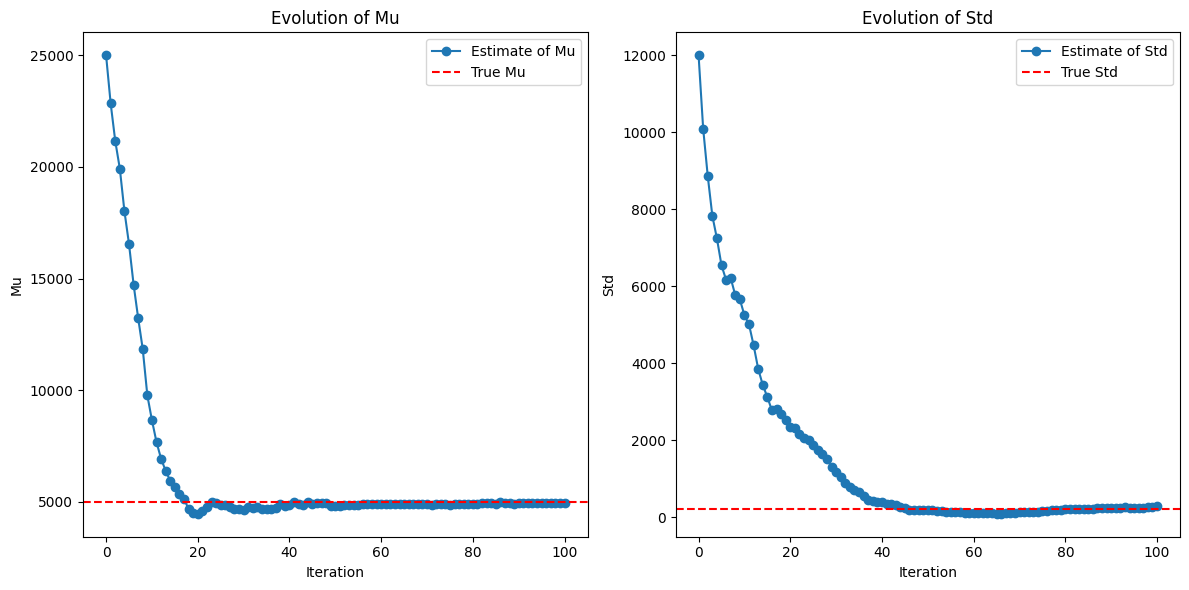

In [4]:
plot_estimates(model.history_mu, model.history_std, true_mu, true_std)

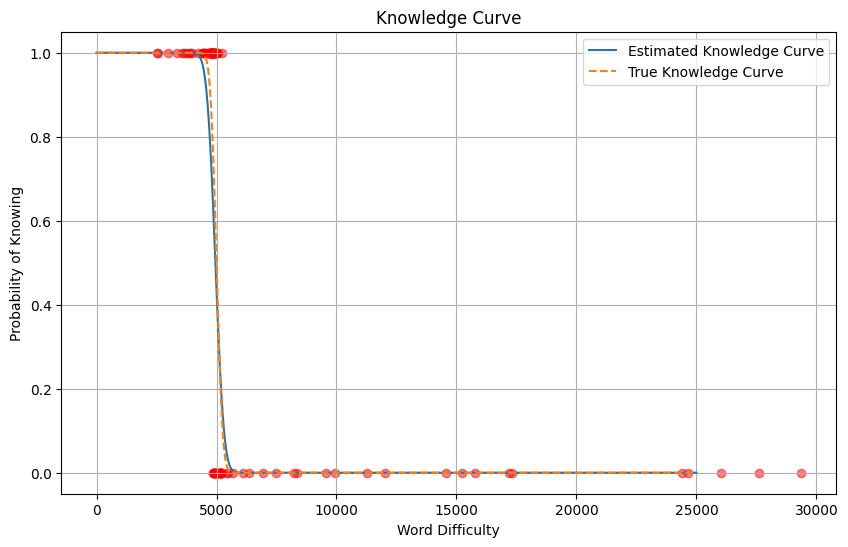

In [5]:
plot_knowledge_curve(
    model.observed_difficulties,
    model.observed_responses,
    model.mu0,
    model.std0,
    true_mu,
    true_std,
)

In [ ]:
animate_normal_distributions(
    model.history_mu,
    model.history_std,
    true_mu,
    true_std,
)

# Non-Bayesian

In [6]:
# Initialize the model
model = VocabularyKnowledgeModel(
    mu0=25_000, std0=12_000, max_num_words=50_000
)

# Run Thompson sampling
model.thompson_sampling(
    env, 
    num_iterations=100, 
    method="non-bayesian", 
    opt_iterations=500, 
    link_function='logit',
    verbose=False,
)

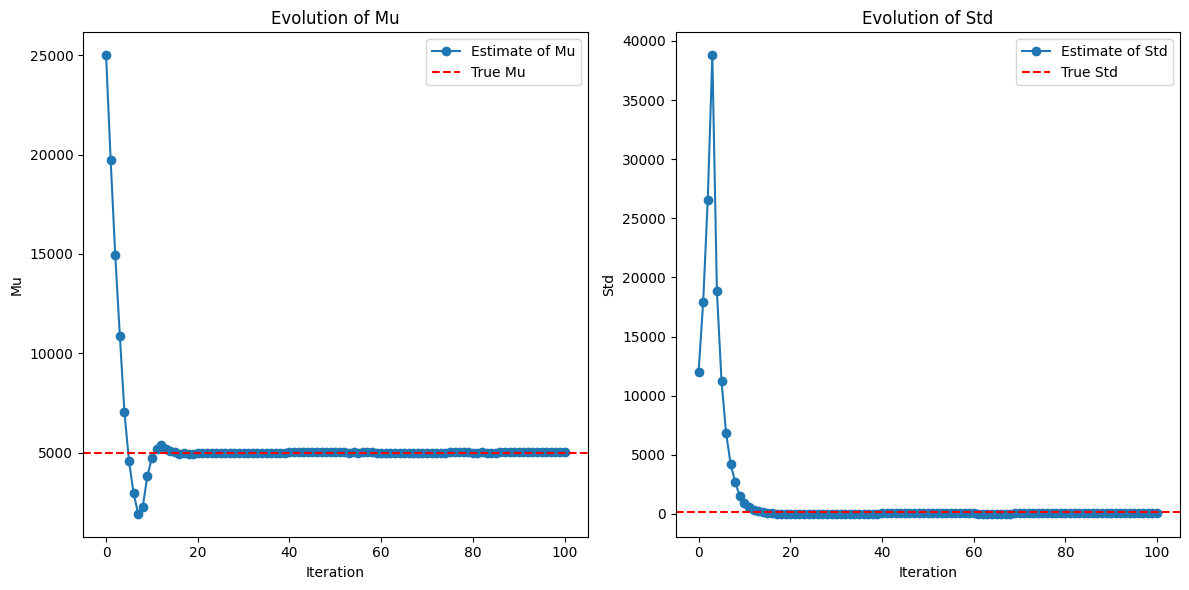

In [7]:
plot_estimates(model.history_mu, model.history_std, true_mu, true_std)

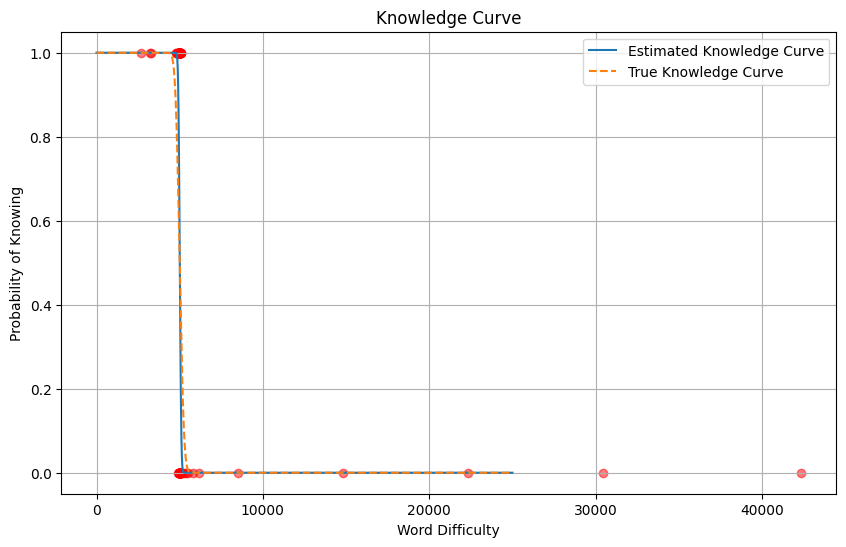

In [8]:
plot_knowledge_curve(
    model.observed_difficulties,
    model.observed_responses,
    model.mu0,
    model.std0,
    true_mu,
    true_std,
)


# Conclusions

- Bayesian method is more conservative in estimating standard deviation, i.e. it will ask more diverse questions.
- Non-Bayesian method is more aggressive in estimating standard deviation, i.e. it will ask more similar questions.
- Non-Bayesian method is much faster to run.
- Naturally, the higher the standard deviation of a user's knowledge, the longer it takes to converge.


**In practice, running the vocaulary quiz, the variation between runs is higher in non-bayesian approach, as it quickly narrows down on a specific difficulty, and does not change much after that. The Bayesian approach, on the other hand, keeps a higher level of uncertainty, and is more resilient to the results of early lucky or unlucky draws.**